In [2]:
library(tidyverse)
library(plyr)
library(ggrepel)

In [4]:
code_dir <- getwd()
tool_dir <- unlist(strsplit(code_dir,"/"))
tool_dir <- head(tool_dir, length(tool_dir)-1)
tool_dir <- paste(c(tool_dir, "tools"), collapse="/")
source(file.path(tool_dir, "pl_functions.R"))
base_dir <- gsub("/plotting_codes", "", code_dir)
base_dir

[1] "/media/pipkin/ROCKET-PRO/CD8_DEV_SC"

In [9]:
exp_name <- "2_IL2RAKO_Nascent"

use.path <- file.path(base_dir, '9_Figures', exp_name, 
                      'volcano_plots')
dir.create(use.path, showWarnings = FALSE, recursive=TRUE)
setwd(use.path)

# WT v.s. KO

In [6]:
de.dir <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/3_IL2RAKO_Nascent/2_DE/0_original_GN'

*48h*

Parsed with column specification:
cols(
  `Unnamed: 0` = col_character(),
  baseMean = col_double(),
  log2FoldChange = col_double(),
  lfcSE = col_double(),
  stat = col_double(),
  pvalue = col_double(),
  padj = col_double(),
  gene_name = col_character()
)

The following `from` values were not present in `x`: yes_TRUE_G1, yes_TRUE_G2, no_TRUE_G1, no_TRUE_G2

Warning message:
“Removed 9388 rows containing missing values (geom_point).”
Warning message:
“Removed 12 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 9388 rows containing missing values (geom_point).”
Warning message:
“Removed 12 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 9388 rows containing missing values (geom_point).”
Warning message:
“Removed 12 rows containing missing values (geom_text_repel).”


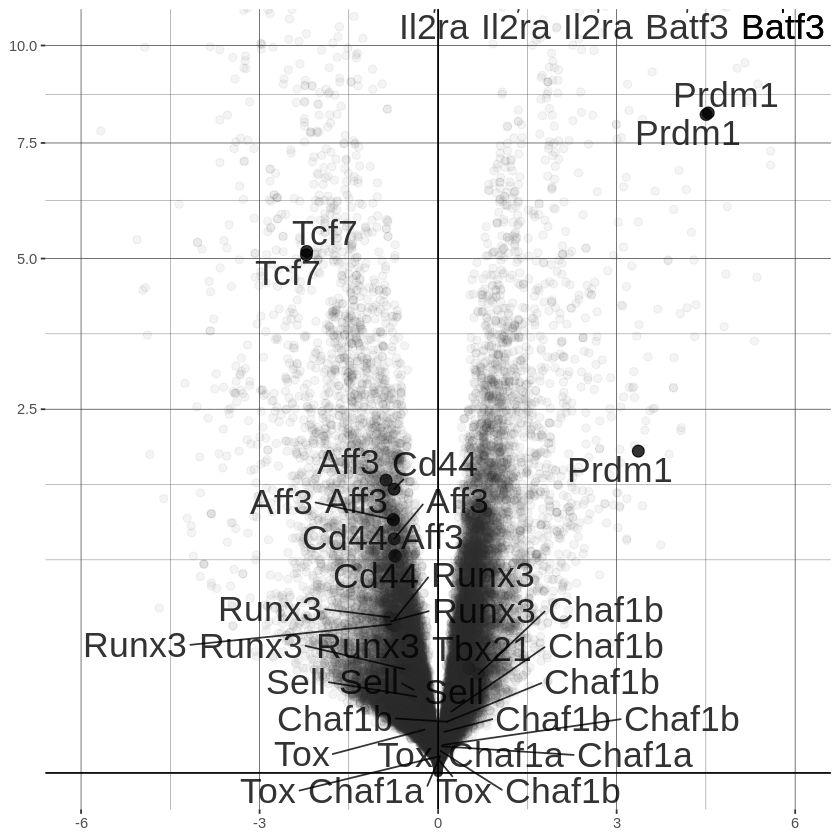

In [25]:
###----- Setup
de.file <- file.path(de.dir, 'nondupr_WT_48h_vs_KO_48h_addGN.csv')
outname.base <- "WT48h_vs_KO48h"
use.genes <- c("Tbx21", "Il2ra", "Batf3", "Runx3", "Tcf7", "Tox", "Sell", "Cd44", "Klrg1",
              "Chaf1a", "Chaf1b", "Aff3", "Prdm1")
log2fc.c <- 7
nlog10p.c <- 8


de.df <- read_csv(de.file)
colnames(de.df) <- c('ENSEMBL', 'baseMean', 'log2fc', 'lfcSE', 'stat', 'pvalue','padj','gene_name')
de.df$nlog10pval <- -log10(de.df$padj)

vol_plot <- volcano_plot(de.df, use.genes , log2fc.c, nlog10p.c, c(-6,6), 10) # With label
ggsave(paste(outname.base, ".png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')
vol_plot
vol_plot <- vol_plot + theme(axis.text.x=element_blank(), axis.text.y=element_blank()) # Without label
ggsave(paste(outname.base, "_nolabel.png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')